# Graded Challenge 1

Name  : **Dafa Wiratama**
Kelas : **Data Science**
Batch : **Batch 09**

## Description

From this assignment, we will be using the [Pokémon with stats](https://www.kaggle.com/abcsds/pokemon) dataset by [Alberto Barradas](https://www.kaggle.com/abcsds)

### Objective

- Using the `Pokémon dataset` we will rank the Pokémon by their stats and find the best Damage Dealer.
- Using the `Pokémon dataset` we will group the Pokémon by their type - and compute the average stats of each type.
- Using the `Pokémon dataset` we will find the best Pokémon.

### Problem Statement

- Find the best Pokémon by using the highest attack, defense, and stamina.
- Base on dataset features, we will try to find best damage dealer Pokémon.
- Using all features, we will try to find the best Pokémon by overall.


## Working Area
### Library Import
we will import all the libraries we will need for this assignment
- numpy for numerical computation
- pandas for data manipulation
- matplotlib for data visualization

Please uncomment the following 4 line to install the libraries

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Notebook Configuration

`pd.set_option` is used to set the options for pandas.
and we will define max_colwidth to be None (Unlimited).

In [3]:
pd.set_option('display.max_colwidth', None)

## Dataset Loading
we will load the downloaded dataset from the kaggle website into pandas dataframe using read_csv function
use index_col=0 as param, because the dataset already contain the index column, so we will use it instead of creating a new index column

In [4]:
df = pd.read_csv('Pokemon.csv', index_col=0)

## Data Exploration
we will explore the dataset using the head function to show the first 5 rows of the dataset

from the dataset, we can see that there are 12 features (13 with index).
1. **index column**
2. **name** of the Pokémon
string
3. **main type** of the Pokémon
categorical string
4. **second type** of the Pokémon
nullable categorical string
5. **total stats** of Pokémon
we will drop this column because it is just an aggregated value, and we will not use it in this assignment
6. **health points**
numerical starting from 1 into Infinity
7. **attack points**
numerical starting from 1 into Infinity
8. **defense points**
numerical starting from 1 into Infinity
9. **special attack points**
numerical starting from 1 into Infinity
we will drop this column because still not clear what it is
10. **special defense points**
numerical starting from 1 into Infinity
we will drop this column because still not clear what it is
11. **speed points** witch determine attack/defence interval
numerical starting from 1 into Infinity
12. **generation** of the Pokémon base on first time appear on public
numerical category starting from 1 into 6
we will drop this column because we will not use it in this assignment
13. **legendary status** of the Pokémon
binary category

In [5]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Using DataFrame.info() function, we can see the following information about the dataset
every column has a type, and the number of unique values in each column and almost all the columns have 800 entries
but column `Type 2` only 414 entries we will investigate this column later

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


### Dataset Visualization
we will visualize the dataset using the graph to show the distribution of the dataset

#### Pokémon Type_1 Distribution
from the visualization, we can see that Grass, Fire, Water, Bug, Normal are the most common type of Pokémon

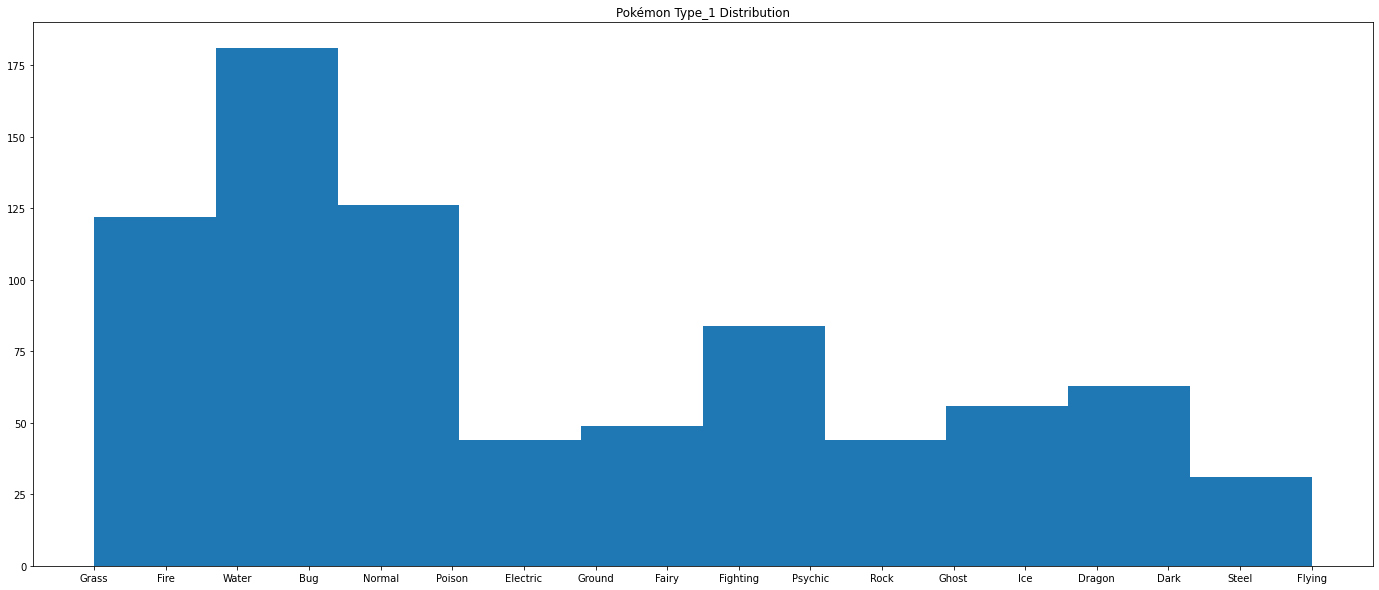

In [7]:
plt.figure(figsize=(24, 10))
plt.title('Pokémon Type_1 Distribution')
plt.hist(df['Type 1']);

#### Legendary Pokémon Distribution
from the visualization, we can see that over 700 non-legendary Pokémon are found, and less than 100 legendary Pokémon are found

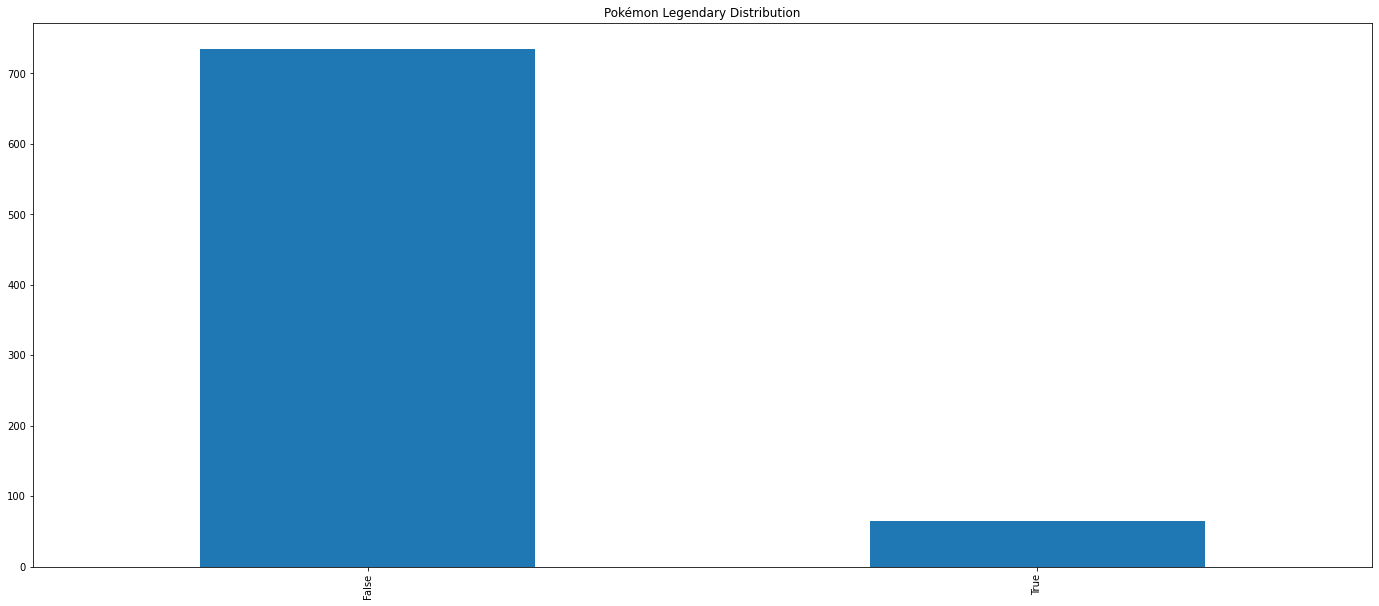

In [8]:
plt.figure(figsize=(24, 10))
plt.title('Pokémon Legendary Distribution')
df['Legendary'].value_counts().plot(kind='bar');

let's Calculate the absolute value of distribution using pandas

In [9]:
non_legendary, legendary = df['Legendary'].value_counts().values
print('non-legendary:', non_legendary)
print('legendary:', legendary)

non-legendary: 735
legendary: 65


#### Function to Display Pokémon Stats
we will define a function to display the Pokémon stats distribution using boxplot
with seaborne library

In [10]:
def box_plot(_df, col):
    plt.figure(figsize=(24, 12))
    sns.boxplot(data=_df, x='Type 1', y=col)
    sns.swarmplot(data=_df, x='Type 1', y=col, color='black')
    plt.show()

### Pokémon Attack Distribution Against Type_1
after we visualize the dataset, we can see that Dragon type have higher attack mean than other type
and Fairy type have the lowest attack mean than other type

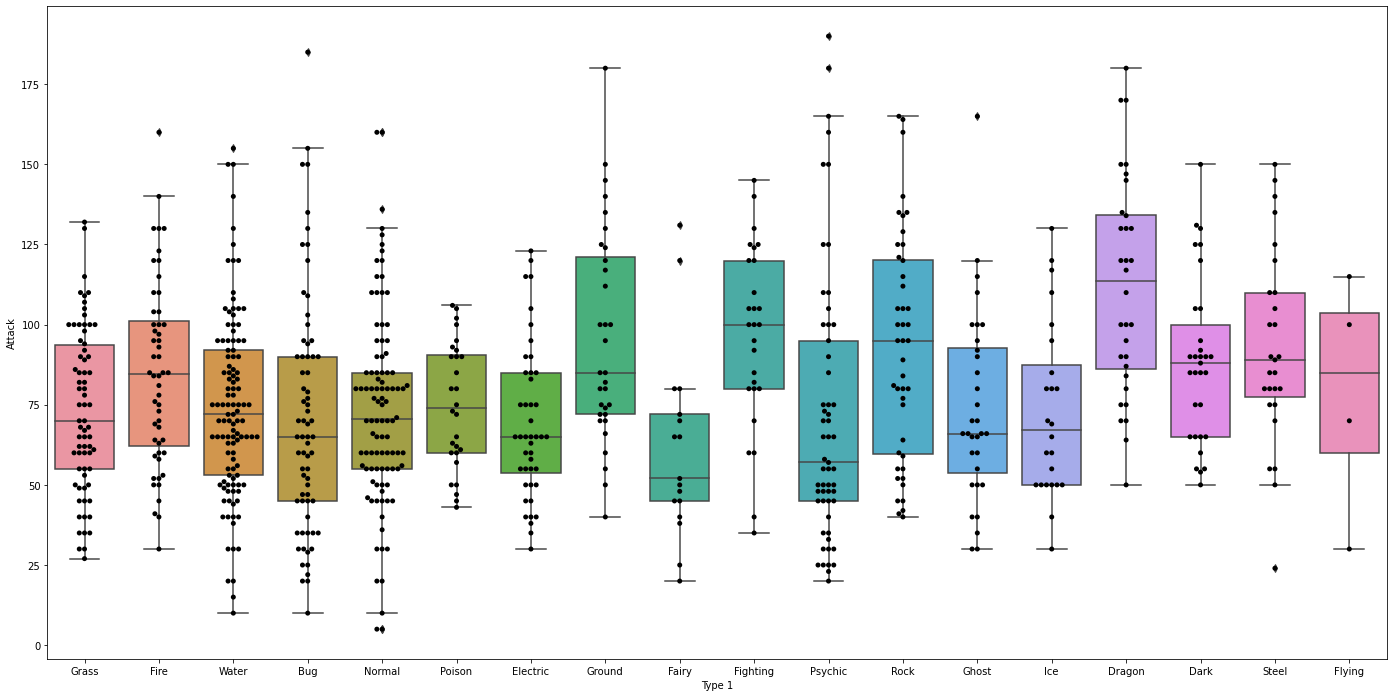

In [11]:
box_plot(df, 'Attack')

### Pokémon Defense Distribution Against Type_1
after we visualize the dataset, we can see that Steel type have higher Defense mean than other type
and Normal type have the lowest Defense mean than other type

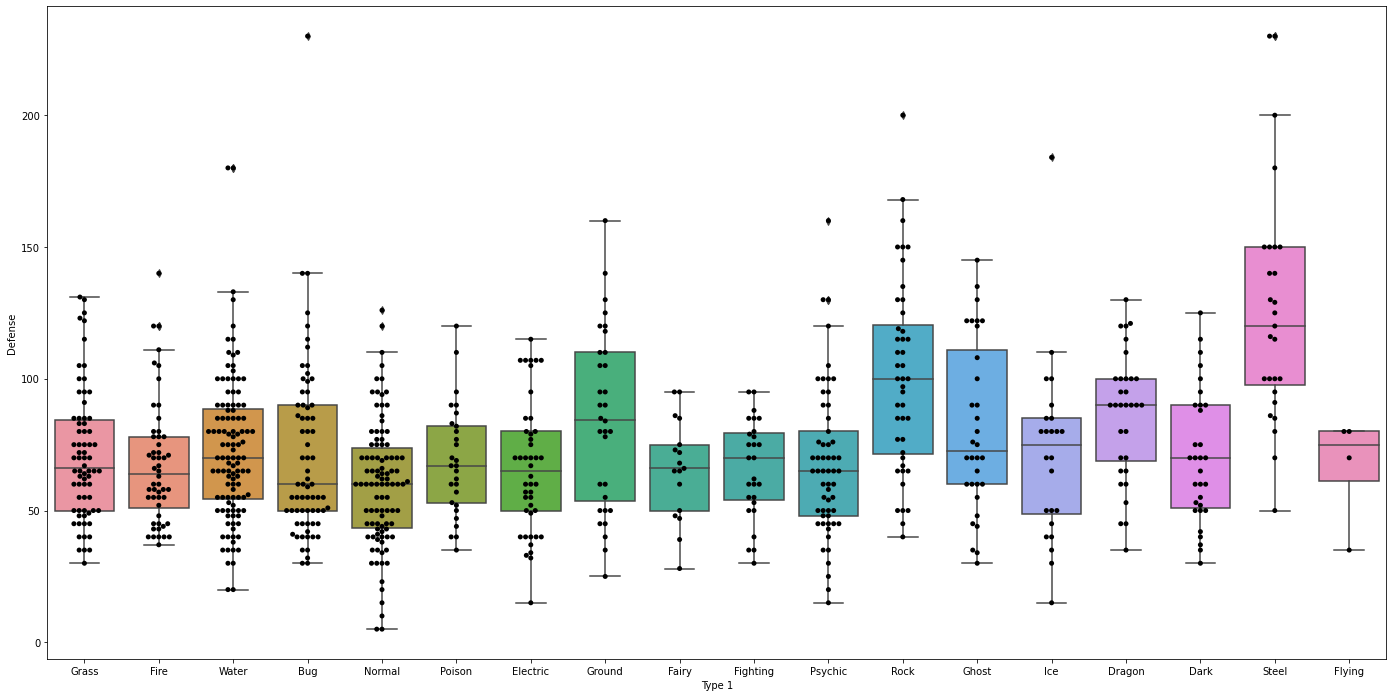

In [12]:
box_plot(df, 'Defense')

### Pokémon Speed Distribution Against Type_1
after we visualize the dataset, we can see that Flying type have higher Speed mean than other type
and Steel type have the lowest Speed mean than other type

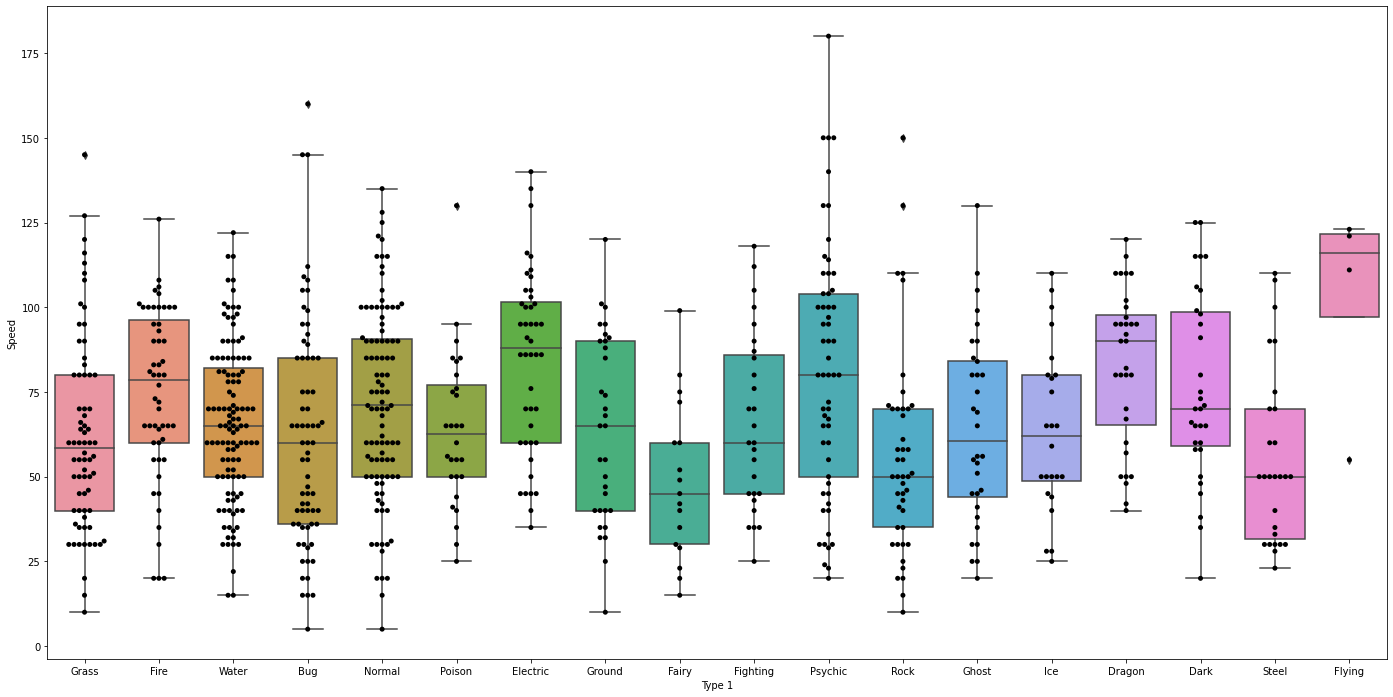

In [13]:
box_plot(df, 'Speed')

## Data Preprocessing
- **Data Cleaning**
Drop unnecessary columns (Total, Generation) and fill missing values with appropriate values
- **Feature Engineering**
We will create new features from the existing features (DPS)

In [14]:
df.drop(['Total', 'Sp. Atk', 'Sp. Def', 'Generation'], axis=1, inplace=True);

In [15]:
df['Type 2'] = df['Type 2'].fillna('None')

#### Column Renaming
we will rename the columns to make it easier to understand and use by eliminating the spaces and capitalization

In [16]:
df.rename(columns={
    'Name': 'name',
    'Type 1': 'main_type',
    'Type 2': 'sub_type',
    'HP': 'hp',
    'Attack': 'attack',
    'Defense': 'defense',
    'Speed': 'speed',
    'Legendary': 'legendary',
}, inplace=True)
df.head()

,name,main_type,sub_type,hp,attack,defense,speed,legendary
#,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,45,False
2,Ivysaur,Grass,Poison,60,62,63,60,False
3,Venusaur,Grass,Poison,80,82,83,80,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,False
4,Charmander,Fire,None,39,52,43,65,False


### Fetching Top 3 Pokémon by Attack Points

In [17]:
df.sort_values(by=['attack'], ascending=False).head(3)

,name,main_type,sub_type,hp,attack,defense,speed,legendary
#,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,130,True
214,HeracrossMega Heracross,Bug,Fighting,80,185,115,75,False
383,GroudonPrimal Groudon,Ground,Fire,100,180,160,90,True


### Fetching Top 3 Pokémon by Defense Points

In [18]:
df.sort_values(by=['defense'], ascending=False).head(3)

,name,main_type,sub_type,hp,attack,defense,speed,legendary
#,,,,,,,,
213,Shuckle,Bug,Rock,20,10,230,5,False
208,SteelixMega Steelix,Steel,Ground,75,125,230,30,False
306,AggronMega Aggron,Steel,None,70,140,230,50,False


### Fetching Top 3 Pokémon by Health Points

In [19]:
df.sort_values(by=['hp'], ascending=False).head(3)

,name,main_type,sub_type,hp,attack,defense,speed,legendary
#,,,,,,,,
242,Blissey,Normal,None,255,10,10,55,False
113,Chansey,Normal,None,250,5,5,50,False
202,Wobbuffet,Psychic,None,190,33,58,33,False


### Fetching Top 3 Pokémon by Speed Points

In [20]:
df.sort_values(by=['speed'], ascending=False).head(3)

,name,main_type,sub_type,hp,attack,defense,speed,legendary
#,,,,,,,,
386,DeoxysSpeed Forme,Psychic,None,50,95,90,180,True
291,Ninjask,Bug,Flying,61,90,45,160,False
386,DeoxysNormal Forme,Psychic,None,50,150,50,150,True


### Utility Functions
this function will be used to calculate the best of stats from district type of Pokémon

In [21]:
def get_best_of_main_type(_df, column):
    best_attacker = pd.DataFrame(columns=['main_type', 'name', column])
    for main_type in _df['main_type'].unique():
        best_attacker = pd.concat([best_attacker, _df[_df['main_type'] == main_type].sort_values(by=[column], ascending=False).head(1)])
    return best_attacker.sort_values(by=[column], ascending=False)[['main_type', 'name', column]].reset_index(drop=True)

### Query The Best Attacker from Each Type
using function declared above we can query the best attacker of each type of Pokémon

In [22]:
get_best_of_main_type(df, 'attack')

,main_type,name,attack
0,Psychic,MewtwoMega Mewtwo X,190
1,Bug,HeracrossMega Heracross,185
2,Ground,GroudonPrimal Groudon,180
3,Dragon,RayquazaMega Rayquaza,180
4,Ghost,BanetteMega Banette,165
5,Rock,Rampardos,165
6,Normal,Slaking,160
7,Fire,BlazikenMega Blaziken,160
8,Water,GyaradosMega Gyarados,155
9,Steel,AegislashBlade Forme,150


### Query The Best Defender from Each Type

In [23]:
get_best_of_main_type(df, 'defense')

,main_type,name,defense
0,Bug,Shuckle,230
1,Steel,SteelixMega Steelix,230
2,Rock,Regirock,200
3,Ice,Avalugg,184
4,Water,Cloyster,180
5,Ground,GroudonPrimal Groudon,160
6,Psychic,DeoxysDefense Forme,160
7,Ghost,Cofagrigus,145
8,Fire,Torkoal,140
9,Grass,Ferrothorn,131


### Query The Best Speed from Each Type

In [24]:
get_best_of_main_type(df, 'speed')

,main_type,name,speed
0,Psychic,DeoxysSpeed Forme,180
1,Bug,Ninjask,160
2,Rock,AerodactylMega Aerodactyl,150
3,Grass,SceptileMega Sceptile,145
4,Electric,Electrode,140
5,Normal,LopunnyMega Lopunny,135
6,Poison,Crobat,130
7,Ghost,GengarMega Gengar,130
8,Fire,Talonflame,126
9,Dark,Darkrai,125


## Feature Engineering
we will create new features/column from the existing features witch we can derive from the existing features
DPS (damage per second) = attack points / second
let's say n point of speed is 1/n second so the formula became `attack points` * `speed points`

In [25]:
df['dps'] = df['attack'] * df['speed'];

### Fetching Top 3 Pokémon by DPS

In [26]:
df.sort_values(by=['dps'], ascending=False).head(3)

,name,main_type,sub_type,hp,attack,defense,speed,legendary,dps
#,,,,,,,,,
386,DeoxysAttack Forme,Psychic,None,50,180,20,150,True,27000
150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,130,True,24700
386,DeoxysNormal Forme,Psychic,None,50,150,50,150,True,22500


### Utilities Code
code below used to reorder the columns in the dataset by some attribute

In [27]:
def get_best_by_attribute(dataframe, attribute):
    return dataframe.sort_values(by=[attribute], ascending=False).reset_index(drop=True)

### Top 10 Pokémon Leaderboard Ranked by Attribute

In [28]:
leaderboard = pd.DataFrame()

leaderboard["Top Attack"] = get_best_by_attribute(df, 'dps').name
leaderboard["Top Defense"] = get_best_by_attribute(df, 'defense').name
leaderboard["Top Health"] = get_best_by_attribute(df, 'hp').name
leaderboard["Top Speed"] = get_best_by_attribute(df, 'speed').name
leaderboard["Top DPS"] = get_best_by_attribute(df, 'dps').name

print("Top 10 Pokémon Leaderboard")
leaderboard.head(10)

Top 10 Pokémon Leaderboard


,Top Attack,Top Defense,Top Health,Top Speed,Top DPS
0,DeoxysAttack Forme,Shuckle,Blissey,DeoxysSpeed Forme,DeoxysAttack Forme
1,MewtwoMega Mewtwo X,SteelixMega Steelix,Chansey,Ninjask,MewtwoMega Mewtwo X
2,DeoxysNormal Forme,AggronMega Aggron,Wobbuffet,DeoxysNormal Forme,DeoxysNormal Forme
3,BeedrillMega Beedrill,Steelix,Wailord,AerodactylMega Aerodactyl,BeedrillMega Beedrill
4,MewtwoMega Mewtwo Y,Regirock,Alomomola,AlakazamMega Alakazam,MewtwoMega Mewtwo Y
5,RayquazaMega Rayquaza,Avalugg,Snorlax,DeoxysAttack Forme,RayquazaMega Rayquaza
6,AerodactylMega Aerodactyl,Cloyster,Drifblim,BeedrillMega Beedrill,AerodactylMega Aerodactyl
7,LopunnyMega Lopunny,SlowbroMega Slowbro,Slaking,SceptileMega Sceptile,LopunnyMega Lopunny
8,GalladeMega Gallade,Aggron,GiratinaAltered Forme,Accelgor,GalladeMega Gallade
9,DiancieMega Diancie,Bastiodon,GiratinaOrigin Forme,MewtwoMega Mewtwo Y,DiancieMega Diancie


### Top 10 Pokémon Leaderboard Ranked (Legendary Only)

In [29]:
legendary_leaderboard = pd.DataFrame()

legendary_df = df[df['legendary'] == True]

legendary_leaderboard["Top Attack"] = get_best_by_attribute(legendary_df, 'dps').name
legendary_leaderboard["Top Defense"] = get_best_by_attribute(legendary_df, 'defense').name
legendary_leaderboard["Top Health"] = get_best_by_attribute(legendary_df, 'hp').name
legendary_leaderboard["Top Speed"] = get_best_by_attribute(legendary_df, 'speed').name
legendary_leaderboard["Top DPS"] = get_best_by_attribute(legendary_df, 'dps').name

print("Top 10 Legendary Pokémon Leaderboard")
legendary_leaderboard.head(10)

Top 10 Legendary Pokémon Leaderboard


,Top Attack,Top Defense,Top Health,Top Speed,Top DPS
0,DeoxysAttack Forme,Regirock,GiratinaOrigin Forme,DeoxysSpeed Forme,DeoxysAttack Forme
1,MewtwoMega Mewtwo X,DeoxysDefense Forme,GiratinaAltered Forme,DeoxysAttack Forme,MewtwoMega Mewtwo X
2,DeoxysNormal Forme,GroudonPrimal Groudon,Xerneas,DeoxysNormal Forme,DeoxysNormal Forme
3,MewtwoMega Mewtwo Y,Diancie,Yveltal,MewtwoMega Mewtwo Y,MewtwoMega Mewtwo Y
4,RayquazaMega Rayquaza,Registeel,KyuremWhite Kyurem,Mewtwo,RayquazaMega Rayquaza
5,DiancieMega Diancie,Groudon,Kyurem,MewtwoMega Mewtwo X,DiancieMega Diancie
6,DeoxysSpeed Forme,Uxie,KyuremBlack Kyurem,ShayminSky Forme,DeoxysSpeed Forme
7,GroudonPrimal Groudon,Lugia,Arceus,Darkrai,GroudonPrimal Groudon
8,KyuremBlack Kyurem,Cobalion,Entei,TornadusTherian Forme,KyuremBlack Kyurem
9,Regigigas,Zygarde50% Forme,Regigigas,Arceus,Regigigas


### Pokémon Stats by Main Type

for this task, we will use the main_type column to group the data by main_type
using the groupby method, we can get the mean of each attribute for each main_type

from the result below, we can clearly see that dps best is Dragon Type

In [30]:
stats_by_main_type = df.groupby(['main_type']).mean()
stats_by_main_type

,hp,attack,defense,speed,legendary,dps
main_type,,,,,,
Bug,56.884058,70.971014,70.724638,61.681159,0.000000,4932.840580
Dark,66.806452,88.387097,70.225806,76.161290,0.064516,7107.677419
Dragon,83.312500,112.125000,86.375000,83.031250,0.375000,9774.593750
Electric,59.795455,69.090909,66.295455,84.500000,0.090909,5909.159091
Fairy,74.117647,61.529412,65.705882,48.588235,0.058824,3354.470588
Fighting,69.851852,96.777778,65.925926,66.074074,0.000000,6667.000000
Fire,69.903846,84.769231,67.769231,74.442308,0.096154,6564.846154
Flying,70.750000,78.750000,66.250000,102.500000,0.500000,8781.250000
Ghost,64.437500,73.781250,81.187500,64.343750,0.062500,4909.343750


In [31]:
print("Best DPS is From Main Type :", stats_by_main_type.dps.idxmax())

Best DPS is From Main Type : Dragon


### Pokémon Stats by Secondary Type

from the result below, we can clearly see that best dps is Fighting Type

In [32]:
stats_by_sub_type = df.groupby(['sub_type']).mean()
stats_by_sub_type

,hp,attack,defense,speed,legendary,dps
sub_type,,,,,,
Bug,53.333333,90.000000,80.000000,61.666667,0.000000,5333.333333
Dark,75.550000,109.800000,72.050000,75.350000,0.050000,8339.300000
Dragon,82.166667,94.444444,87.055556,80.555556,0.222222,7939.611111
Electric,88.166667,72.666667,68.333333,71.500000,0.166667,5569.166667
Fairy,64.304348,61.608696,73.869565,61.217391,0.086957,4261.391304
Fighting,79.461538,112.846154,82.500000,87.384615,0.153846,10208.884615
Fire,71.250000,81.250000,80.166667,79.666667,0.250000,6974.166667
Flying,71.391753,80.288660,68.309278,85.721649,0.134021,7329.525773
Ghost,59.142857,84.142857,82.285714,53.857143,0.071429,4485.714286


In [33]:
print("Best DPS is From Sub Type :", stats_by_sub_type.dps.idxmax())

Best DPS is From Sub Type : Fighting


### Pokémon Stats by Main and Secondary Type

from this composite group we get the best dps is from Psychic-Fighter Type

In [34]:
stats_by_composite = df.groupby(['main_type', 'sub_type']).mean()
stats_by_composite

hp      attack     defense      speed  legendary  \
main_type sub_type                                                            
Bug       Electric  60.000000   62.000000   55.000000  86.500000   0.000000   
          Fighting  80.000000  155.000000   95.000000  80.000000   0.000000   
          Fire      70.000000   72.500000   60.000000  80.000000   0.000000   
          Flying    63.000000   70.142857   61.571429  82.857143   0.000000   
          Ghost      1.000000   90.000000   45.000000  40.000000   0.000000   
...                       ...         ...         ...        ...        ...   
Water     None      66.847458   71.830508   69.203390  67.881356   0.050847   
          Poison    61.666667   68.333333   58.333333  85.000000   0.000000   
          Psychic   87.000000   73.000000  104.000000  44.000000   0.000000   
          Rock      70.750000   82.750000  112.750000  36.000000   0.000000   
          Steel     84.000000   86.000000   88.000000  60.000000   0.000000   

                             dps  
main_type sub_type                
Bug       Electric   5685.500000  
          Fighting  12250.000000  
          Fire       5550.000000  
          Flying     6223.357143  
          Ghost      3600.000000  
...                          ...  
Water     None       4975.322034  
          Poison     5958.333333  
          Psychic    3270.000000  
          Rock       3011.750000  
          Steel      5160.000000  

[154 rows x 6 columns]

In [35]:
print("Best DPS is From :", *stats_by_composite.dps.idxmax())

Best DPS is From : Psychic Fighting


### Best Overall Pokémon
Scored from cumulative sum of attributes Rankings witch mean higher the ranking smaller the value

In [36]:
best_overall = pd.DataFrame()

for name in df['name']:
    acc = 0
    acc += leaderboard.index[leaderboard["Top Attack"] == name]
    acc += leaderboard.index[leaderboard["Top Defense"] == name]
    acc += leaderboard.index[leaderboard["Top Health"] == name]
    acc += leaderboard.index[leaderboard["Top Speed"] == name]

    row = pd.DataFrame([{'name': name, 'score': acc[0]}])

    best_overall = pd.concat([best_overall, row], ignore_index=True)
    best_overall = best_overall.sort_values(by=['score'])

best_overall.head(10)

,name,score
0,Arceus,147
1,SalamenceMega Salamence,183
2,MewtwoMega Mewtwo X,205
3,RayquazaMega Rayquaza,250
4,Regigigas,261
5,Lugia,278
6,Slaking,294
7,MetagrossMega Metagross,304
8,Mewtwo,315
9,GarchompMega Garchomp,319


### Best Overall Pokémon vs Weakest Overall Pokémon

after we get the best overall Pokémon, we can compare it with the weakest overall Pokémon

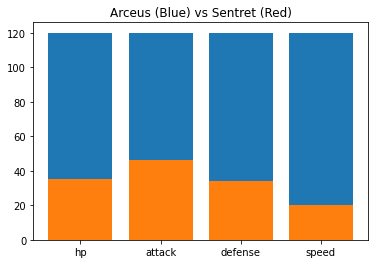

In [37]:
rank_1 = best_overall.loc[0, 'name']
rank_last = best_overall.loc[798, 'name']

columns = ['hp', 'attack', 'defense', 'speed']

rank_1_stats = df[df['name'] == rank_1][columns].values[0]
rank_last_stats = df[df['name'] == rank_last][columns].values[0]

plt.title(f'{rank_1} (Blue) vs {rank_last} (Red)')

plt.bar(columns, rank_1_stats)
plt.bar(columns, rank_last_stats);

## Conclusions, Assumptions, Overall Analysis

### Conclusions

from given data we can create new features/columns from the existing features to better understand the data using new features
As we can see from the leaderboard, the top Pokémon (Archeus) are the most powerful Pokémon in the game in terms of attack, defense, health, speed.
and with grouping technique, we can see that the best overall Pokémon is Dragon-Type


### Assumptions

from the analysis we can conclude that Arceus is the best Pokémon in the game and that not surprising because Archeus is a "GOD" in Pokémon universe.


### Overall Analysis

from the analysis step before we can see that there are many way to rank the Pokémon from attributes.
like by Attack, Defense, Health, Speed and DPS.
then from base stat's leaderboard we can determine the best overall Pokémon.
and from grouped stats we can calculate the best overall Pokémon belongs to which main type and subtype.

